<a href="https://colab.research.google.com/github/mokshitagupta/qlearning/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DETERMINISTIC
#because env is deterministic, rewards stay at the same place

!pip install gym numpy
import gym
from gym import spaces
import random
import numpy as np
import math

class DeterministicEnvironment(gym.Env):
  def __init__(self, startPosition = 0, steps = 0):
    # Initializes the class
    # Define action and observation space
    self.ROWS = 6
    self.COLS = 6
    self.cells = self.ROWS * self.COLS
    self.grid = []
    self.start = self.currPos = startPosition
    self.ended = False

    #actions - left, right, up, down
    self.moves = {"left":-1, "right":+1, "up":-self.ROWS, "down":self.ROWS}
    self.moveRecord = []

    #make as many as 40% of action space moves if not specified
    self.steps = steps
    self.totalSteps = steps
    if steps == 0:
      self.steps = int(self.cells*0.4)

    #environment - grocery store
    self.rewards = {"apple":15,"spinach":3,"chips":10,"checkout":20,"visited":-2}
    self.rewardCount = int(self.cells * 0.70)
    self.earned = 0
    self.points = 0

    self.grid = [[0 for _ in range(self.COLS)] for _ in range(self.ROWS)]
    self.grid[self.start//self.COLS][self.start%self.COLS] = 1
    self.grid[self.ROWS-1][self.COLS-1] = "checkout"
    free = [i for i in range(1,self.cells-1) if i != self.start]
    for _ in range(self.rewardCount):
      ind = random.randint(0,len(free)-1)
      el = free[ind]

      #place random reward on the grid
      self.grid[el//self.COLS][el%self.COLS] = random.choice([x for x in self.rewards.keys() if x != "checkout"])
      #mark that space occupied
      del free[ind]

    #initialize the environment with rewards
    self.initialGrid = self.grid.copy()


  def step(self, action):
    # Executes one timestep within the environment
    # Input to the function is an action

    # #validate that we have time left
    # if self.steps <= 0:
    #   return
    # self.steps -= 1

    #validate if action is valid

    # print("before")
    # self.printGrid()
    if self.ended:
      return {"count":0, "reward":0}
    move = self.currPos + self.moves[action]

    # print(f"making move: {action}")

    if move >= 0 and move <= self.cells-1:
      if (action == "left" or action == "right") and (move//self.COLS != self.currPos//self.COLS):
        #dont allow wrapping
        # print("invalid move")
        return {"count":0, "reward":-10}
    else:
      #cant make out of bounds move
      # print("invalid move")
      return {"count":0, "reward":-10}



    #collect reward
    reward = self.grid[move//self.COLS][move%self.COLS]
    earn = point = 0

    if reward == "checkout":
      self.ended = True
      return {"count":1, "reward":self.rewards[reward]}


      # print(f"------- earned a reward! total: {self.earned}, points: {self.points}")

    #move to new pos
    self.grid[move//self.COLS][move%self.COLS] = 1
    self.grid[self.currPos//self.COLS][self.currPos%self.COLS] = "visited"
    self.currPos = move
    # print("after")
    # self.printGrid()

    if reward  != 0:
      self.earned += 1
      self.points += self.rewards[reward]
      earn +=1
      point += self.rewards[reward]

    # #debug
    # self.printGrid()

    return {"count":earn, "reward":point}



  def reset(self, steps=10):
    # Resets the state of the environment to an initial state
    self.grid[self.currPos//self.COLS][self.currPos%self.COLS] = 0

    self.earned = self.points = 0
    self.steps = steps
    self.ended = False
    self.currPos = 0
    self.grid =self.initialGrid
    self.grid[self.start//self.COLS][self.start%self.COLS] = 1
    self.grid[self.ROWS-1][self.COLS-1] = "checkout"

  def render(self):
    # Visualizes the environment
    # Any form like vector representation or visualizing using matplotlib will be sufficient
    for row in self.grid:
      print(row)

  def printGrid(self):
    for row in self.grid:
      print(row)

    print("-------------------------")

  def getMoves(self):
    return list(self.moves.keys())

  def getIndex(self, action):
    move = self.currPos + self.moves[action]
    if move >= 0 and move <= self.cells-1:
      if (action == "left" or action == "right") and (move//self.COLS != self.currPos//self.COLS):
        #dont allow wrapping
        # print("invalid move")
        return self.currPos
    else:
      #cant make out of bounds move
      # print("invalid move")
      return self.currPos
    return move




In [ ]:
# @title
# Run a random agent for at least 10 timesteps to show that the environment logic is defined correctly.
# Print the current state, chosen action, reward and return your grid world visualization for each step


env = DeterministicEnvironment(steps=10)

for i in range(10):
  print("current world:")
  env.render()
  action = random.choice(list(env.moves.keys()))
  info = env.step(action)
  print("took action: ", action)
  print("world after step:")
  env.render()
  print("reward after step:", info["reward"])

  print("-------------------------")


current world:
[1, 'spinach', 'chips', 'spinach', 'spinach', 0]
['visited', 0, 'visited', 'visited', 'apple', 'apple']
[0, 0, 'spinach', 'spinach', 'apple', 'spinach']
[0, 'spinach', 'visited', 'spinach', 'spinach', 0]
[0, 'chips', 0, 'spinach', 'apple', 0]
['apple', 'apple', 'apple', 'visited', 'apple', 'checkout']
took action:  up
world after step:
[1, 'spinach', 'chips', 'spinach', 'spinach', 0]
['visited', 0, 'visited', 'visited', 'apple', 'apple']
[0, 0, 'spinach', 'spinach', 'apple', 'spinach']
[0, 'spinach', 'visited', 'spinach', 'spinach', 0]
[0, 'chips', 0, 'spinach', 'apple', 0]
['apple', 'apple', 'apple', 'visited', 'apple', 'checkout']
reward after step: -10
-------------------------
current world:
[1, 'spinach', 'chips', 'spinach', 'spinach', 0]
['visited', 0, 'visited', 'visited', 'apple', 'apple']
[0, 0, 'spinach', 'spinach', 'apple', 'spinach']
[0, 'spinach', 'visited', 'spinach', 'spinach', 0]
[0, 'chips', 0, 'spinach', 'apple', 0]
['apple', 'apple', 'apple', 'visited'

In [ ]:
# @title
# #STOCHASTIC
# #because env is stochastic, rewards may disappear after agent collects it

#DETERMINISTIC
#because env is deterministic, rewards stay at the same place

!pip install gym numpy
import gym
from gym import spaces
import random
import numpy as np
import math

class StochasticEnvironment(gym.Env):
  def __init__(self, startPosition = 0, steps = 0):
    # Initializes the class
    # Define action and observation space
    self.ROWS = 6
    self.COLS = 6
    self.cells = self.ROWS * self.COLS
    self.grid = []
    self.start = self.currPos = startPosition
    self.ended = False
    self.rewardProb = 0.85

    #actions - left, right, up, down
    self.moves = {"left":-1, "right":+1, "up":-self.ROWS, "down":self.ROWS}
    self.moveRecord = []

    #make as many as 40% of action space moves if not specified
    self.steps = steps
    self.totalSteps = steps
    if steps == 0:
      self.steps = int(self.cells*0.4)

    #environment - grocery store
    self.rewards = {"apple":15,"spinach":3,"chips":10,"checkout":20,"visited":-2}
    self.rewardCount = int(self.cells * 0.70)
    self.earned = 0
    self.points = 0

    self.grid = [[0 for _ in range(self.COLS)] for _ in range(self.ROWS)]
    self.grid[self.start//self.COLS][self.start%self.COLS] = 1
    self.grid[self.ROWS-1][self.COLS-1] = "checkout"
    free = [i for i in range(1,self.cells-1) if i != self.start]
    for _ in range(self.rewardCount):
      ind = random.randint(0,len(free)-1)
      el = free[ind]

      #place random reward on the grid
      self.grid[el//self.COLS][el%self.COLS] = random.choice([x for x in self.rewards.keys() if x != "checkout"])
      #mark that space occupied
      del free[ind]

    #initialize the environment with rewards
    self.initialGrid = self.grid.copy()


  def step(self, action):
    # Executes one timestep within the environment
    # Input to the function is an action

    # #validate that we have time left
    # if self.steps <= 0:
    #   return
    # self.steps -= 1

    #validate if action is valid

    # print("before")
    # self.printGrid()
    if self.ended:
      return {"count":0, "reward":0}
    move = self.currPos + self.moves[action]

    # print(f"making move: {action}")

    if move >= 0 and move <= self.cells-1:
      if (action == "left" or action == "right") and (move//self.COLS != self.currPos//self.COLS):
        #dont allow wrapping
        # print("invalid move")
        return {"count":0, "reward":-10}
    else:
      #cant make out of bounds move
      # print("invalid move")
      return {"count":0, "reward":-10}



    #collect reward
    reward = self.grid[move//self.COLS][move%self.COLS]
    earn = point = 0

    if reward == "checkout":
      self.ended = True
      return {"count":1, "reward":self.rewards[reward]}


      # print(f"------- earned a reward! total: {self.earned}, points: {self.points}")

    #move to new pos
    self.grid[move//self.COLS][move%self.COLS] = 1
    self.grid[self.currPos//self.COLS][self.currPos%self.COLS] = "visited"
    self.currPos = move
    # print("after")
    # self.printGrid()

    if reward  != 0:
      self.earned += 1
      self.points += self.rewards[reward]
      earn +=1
      point += self.rewards[reward]

      if np.random.uniform(0, 1) < self.rewardProb:
        # print("reward perished :(")
        return {"count":0, "reward":0}

    # #debug
    # self.printGrid()

    return {"count":earn, "reward":point}



  def reset(self, steps=10):
    # Resets the state of the environment to an initial state
    self.grid[self.currPos//self.COLS][self.currPos%self.COLS] = 0

    self.earned = self.points = 0
    self.steps = steps
    self.ended = False
    self.currPos = 0
    self.grid =self.initialGrid
    self.grid[self.start//self.COLS][self.start%self.COLS] = 1
    self.grid[self.ROWS-1][self.COLS-1] = "checkout"

  def render(self):
    # Visualizes the environment
    # Any form like vector representation or visualizing using matplotlib will be sufficient
    for row in self.grid:
      print(row)

  def printGrid(self):
    for row in self.grid:
      print(row)

    print("-------------------------")

  def getMoves(self):
    return list(self.moves.keys())

  def getIndex(self, action):
    move = self.currPos + self.moves[action]
    if move >= 0 and move <= self.cells-1:
      if (action == "left" or action == "right") and (move//self.COLS != self.currPos//self.COLS):
        #dont allow wrapping
        # print("invalid move")
        return self.currPos
    else:
      #cant make out of bounds move
      # print("invalid move")
      return self.currPos
    return move


In [ ]:
# From handout:
#  Run a random agent for at least 10 timesteps to show that the environment logic is defined correctly.
# Print the current state, chosen action, reward and return your grid world visualization for each step


env = StochasticEnvironment(steps=10)

for i in range(10):
  print("current world:")
  env.render()
  action = random.choice(list(env.moves.keys()))
  info = env.step(action)
  print("took action: ", action)
  print("world after step:")
  env.render()
  print("reward after step:", info["reward"])

  print("-------------------------")


current world:
[1, 'chips', 0, 0, 'visited', 'apple']
['spinach', 0, 'spinach', 'chips', 0, 'chips']
['apple', 0, 'visited', 0, 'chips', 'visited']
['spinach', 'visited', 0, 'apple', 'visited', 'spinach']
['chips', 'chips', 'spinach', 0, 'chips', 'chips']
['chips', 'visited', 0, 'chips', 'spinach', 'checkout']
took action:  left
world after step:
[1, 'chips', 0, 0, 'visited', 'apple']
['spinach', 0, 'spinach', 'chips', 0, 'chips']
['apple', 0, 'visited', 0, 'chips', 'visited']
['spinach', 'visited', 0, 'apple', 'visited', 'spinach']
['chips', 'chips', 'spinach', 0, 'chips', 'chips']
['chips', 'visited', 0, 'chips', 'spinach', 'checkout']
reward after step: -10
-------------------------
current world:
[1, 'chips', 0, 0, 'visited', 'apple']
['spinach', 0, 'spinach', 'chips', 0, 'chips']
['apple', 0, 'visited', 0, 'chips', 'visited']
['spinach', 'visited', 0, 'apple', 'visited', 'spinach']
['chips', 'chips', 'spinach', 0, 'chips', 'chips']
['chips', 'visited', 0, 'chips', 'spinach', 'chec

In [ ]:
# @title
#QLEARNING
import pickle
import matplotlib.pyplot as plt
class QLearning:
  def __init__(self, env, episodes = 10) -> None:
    self.env = env
    self.a = 0.12 #[0.1-0.2] 15
    self.g = 0.92 #[0.9 - 0.99] 95
    self.qTable = [[ 0 for _ in range(len(self.env.moves))] for _ in range(self.env.cells)]
    self.iniTable = self.qTable
    self.labels = {"up":0,"down":1, "left":2,"right":3}
    self.episodes = episodes
    self.e = 1
    self.finale = 0.01
    self.decay = (self.finale/self.e)**(1/self.episodes)
    self.moves = self.env.moves

    self.winDistribution = {}
    self.success = 0
    self.steps = 0

    self.epstat = {1:0,0:0}
    self.epData = {}

  def runTimestep(self):

    bestMove = ''
    currpos = self.env.currPos
    # if random num is > than e then choose greedily
    p = np.random.uniform(0, 1)
    # print("prob was: ", p, self.e)
    if  p < self.e:
      bestMove = np.random.choice(self.env.getMoves())
      # print("randomly chose", bestMove)
      self.epstat[1] += 1
    else:
      # print("greedy action")
      self.epstat[0] += 1
      maxReward = -math.inf
      for a in self.env.getMoves():
        # print("checking for", a)
        # print(a,self.env.getIndex(a))
        qval = self.qTable[currpos][self.labels[a]]
        if maxReward < qval:
          bestMove = a
          maxReward = qval

      # print("suspected: ", bestMove)
      maxes = [x for x, y in self.labels.items() if self.qTable[currpos][y] == maxReward]
      # if sum(self.qTable[currpos]) == 0:
      # print(maxes, self.qTable[currpos])
      bestMove = np.random.choice(maxes)
        # print("choosing: ", bestMove)


    # print(self.env.currPos,bestMove)
    info = self.env.step(bestMove)
    qval = self.qTable[currpos][self.labels[bestMove]]
    stplus1 = self.env.currPos

    futureVal = max(self.qTable[stplus1])
    newval = qval + self.a*(info["reward"] + self.g*futureVal - qval)
    # print(newval,currpos, self.env.currPos)
    self.qTable[currpos][self.labels[bestMove]] = newval


    return info
    # self.printTable()


  def runOneEpisode(self):
    epreward = 0
    ended = False
    for i in range(self.env.totalSteps):
      # print("one timestep")
      if not self.env.ended:
        info = self.runTimestep()
        epreward += info["reward"]
      else:
        ended = True
        break

    self.e *= self.decay
    self.epstat = {1:0,0:0}
    return ended, i+1, epreward

  def train(self):
    ends = steps = last = 0
    for i in range(self.episodes):
      ended, t, info = self.runOneEpisode()
      self.epData[i] = self.e
      self.winDistribution[i] = info

      ends+=ended
      steps+=t
      self.env.reset()

    # print("ENDS out of", self.episodes, " - ",ends, "SUCCESS RATE", ends/self.episodes)
    # print("AVG STEPS", steps/self.episodes )
    self.success = ends/self.episodes
    self.steps = steps/self.episodes


# ------ MUST ONLY CALL THESE AFTER CALLING train() ------

  def printTable(self,name=""):

    print("********PRINTING Q TABLE *******")
    for j in self.qTable:
      print(j)
    print("***************")
    with open('qtables_'+name.replace(" ","_")+'.pickle', 'wb') as handle:
        pickle.dump(self.iniTable, handle, protocol=pickle.HIGHEST_PROTOCOL)
        pickle.dump(self.qTable, handle, protocol=pickle.HIGHEST_PROTOCOL)

  def printWins(self,name="D"):
    if self.winDistribution == {}:
      return

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.plot(list(self.winDistribution.keys()), list(self.winDistribution.values()), color ='maroon')

    plt.xlabel("Episodes")
    plt.ylabel("Reward per episode")
    plt.title("Learning process")
    plt.show()

    fig.savefig("reward_"+name+".png")

  def getReward(self):
    if self.winDistribution == {}:
      return

    return sum(self.winDistribution.values())

  def getSuccessRate(self):
    return self.success

  def getSteps(self):
    return self.steps

  def getEpsilonData(self,name="D"):
    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(list(self.epData.keys()), list(self.epData.values()), color ='maroon',
            width = 0.4)

    plt.xlabel("Episodes")
    plt.ylabel("Epsilon")
    plt.title("Epsilon Decay")
    plt.show()
    fig.savefig("e_"+name+".png")

********PRINTING Q TABLE *******
[72.53368742561932, 105.81656662262203, 66.29698668089485, 57.82653803308917]
[-14.167159249932954, 92.30471418417518, -7.889278508637249, -5.5526875228889]
[-12.879867068865497, 5.485902614946417, -5.916469249204184, -5.235938806582531]
[-10.404989077448974, -4.38383098422246, -4.357372984324244, -4.373383935832199]
[-8.655630019664883, -3.5844063623483438, -3.7959088863435455, -3.662210105655485]
[-9.057045381853719, -3.375128326695311, -3.1059980670608907, -8.02355604201508]
[71.72358274733877, 117.19651938083595, 87.34751358867103, 87.08433653716854]
[2.5960166924867476, 123.23282355290148, 20.76822880456863, 3.111434283071114]
[-4.674594130460353, 49.71034613618133, -0.24879116561582482, -4.537858079619726]
[-4.006862692949414, -3.0756277716483336, -4.26077622282181, -3.5851867470170613]
[-3.2899140986195756, -2.2029497807175185, -3.431602395632583, -2.785598015293329]
[-2.8109658457489375, -2.3879763458169454, -3.027556668240342, -8.49996367651156

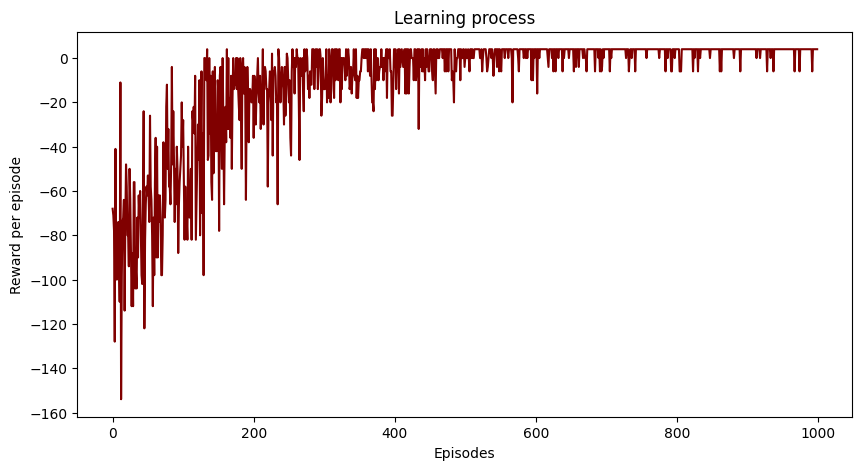

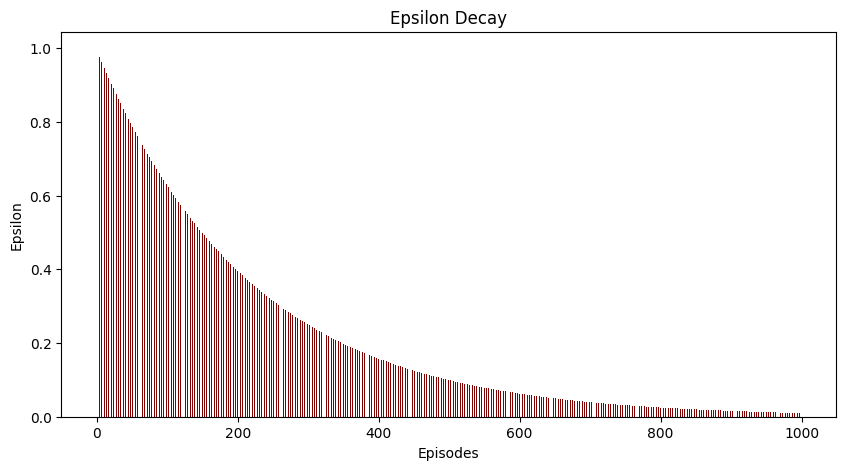

********PRINTING Q TABLE *******
[80.33903171115004, 94.57770853584489, 87.46494332650515, 116.81344878687287]
[85.43936778904148, 127.07884050326892, 87.86530644822659, 109.03075692643218]
[33.44216338117417, 134.0453885080761, 26.10726896564894, 4.0930916092650556]
[-8.91425802804304, 3.8000944817372826, 24.578857948736633, -0.21921467562860783]
[-1.1996674189612533, -0.06960077484209289, 1.5125520337017715, -0.2111989915032267]
[0, 9.13493454063008e-06, -0.3174678461874296, -1.1999632830533222]
[28.878250848928978, 2.5122971400296494, 2.8855789970729053, 121.2235426292656]
[91.85459289699955, 107.16247551173713, 90.0377389707784, 138.1583017755797]
[84.74645721699524, 150.0625922141872, 102.25858878747854, 101.62068163287682]
[1.648568841955759, 134.20614186862414, 20.650209872096234, 1.1605534068047079]
[-0.13512839196465012, -0.5326079228676176, 19.934565546788335, -0.4746968709882336]
[-0.6147297804583514, -0.23995966706100666, -0.01703682252243248, -3.185274209702035]
[0.0488786

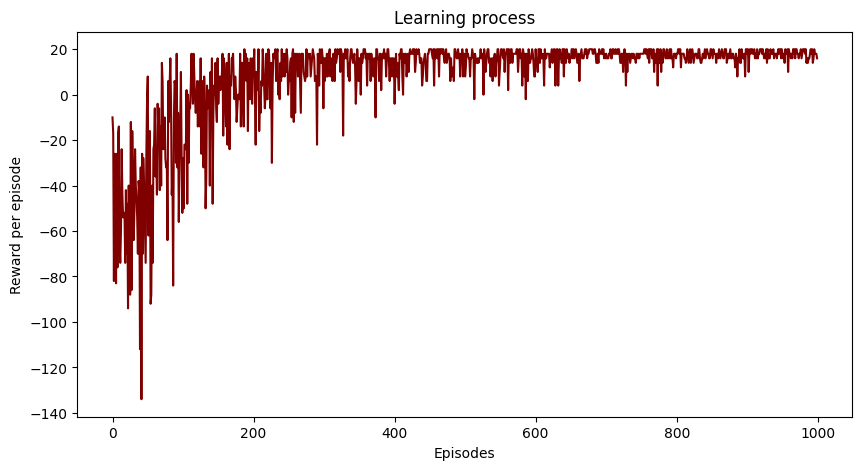

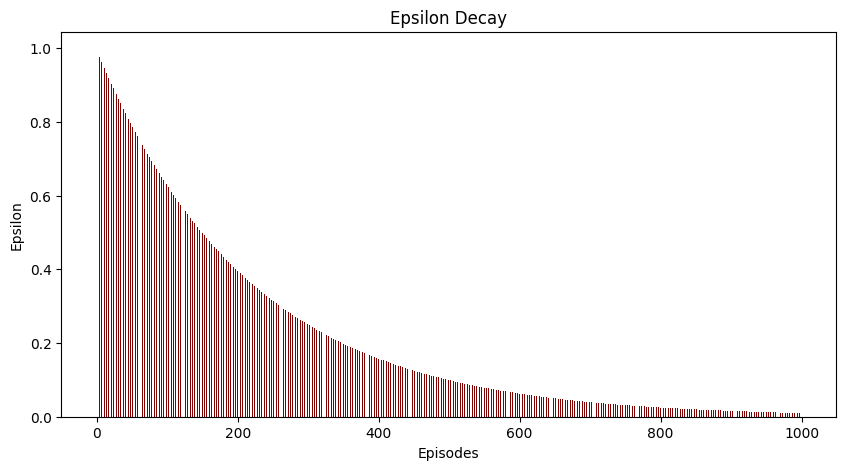

In [ ]:
env = DeterministicEnvironment(steps=25)
ql = QLearning(env,episodes=1000)
# ql.e = -1
ql.train()
ql.printTable("deterministic")
ql.printWins()
ql.getEpsilonData()

env = StochasticEnvironment(steps=25)
ql = QLearning(env,episodes=1000)
ql.train()
ql.printTable("stochastic")
ql.printWins("S")
ql.getEpsilonData("S")

********PRINTING Q TABLE *******
[-7.029395975807108, -6.361619438698526, -7.029395975807108, 105.85082610221974]
[-5.885900621776159, -4.999206018419217, -5.292429118006805, 117.23089676744394]
[-4.731321306316801, 129.60053879486154, -3.8625792618643873, -3.6615964859588774]
[-3.565550592, -2.0732958807310746, -2.561077990840237, -2.575041311864813]
[-2.38848, -0.8558453408695451, -1.6821983128474784, -1.7640274368764082]
[-2.38848, -1.5864211944509985, -1.4751614065556717, -2.38848]
[-5.3115476499845276, -5.031614780709306, -5.885900621776159, -4.8447338961933095]
[-4.087345282189937, -4.025676701270515, -4.137619903791149, -1.155475926241932]
[-2.9207643521142717, -2.875878658381043, -3.1382635396752434, 143.04580186814152]
[-1.9980576313604885, -1.8474064266194026, -1.9440948567140446, 157.66021825214153]
[-1.068156671685038, 173.54545345214152, -1.275066476116969, -1.1577748465917974]
[-1.1028908772332606, -1.0290812618628908, -1.1480688164842783, -1.2]
[-3.9302977684619416, -3.8

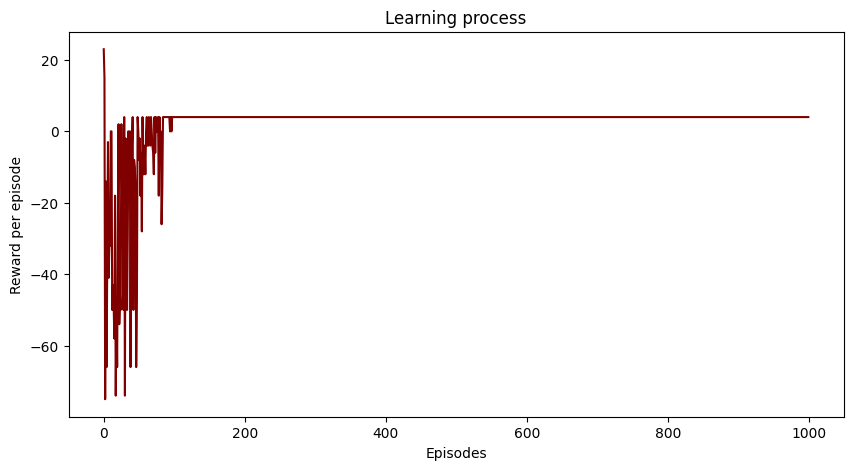

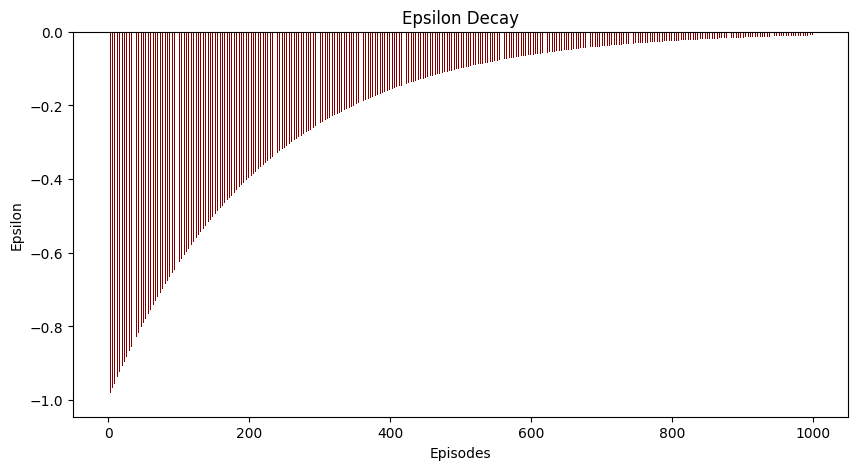

********PRINTING Q TABLE *******
[-1.2, -1.057545977956659, -1.2, 116.52485600034534]
[-1.2, 126.79313007682417, -0.7515646221347748, -0.8965259800534338]
[-1.2, -0.4442665003769436, -0.5370125511747361, -0.2056353718091567]
[-1.2, 0.5770685254108726, -0.5328392907667285, -0.5419970720280299]
[-1.2, -0.29795285437429675, -0.1112685703518846, -0.24]
[-1.2, 0.0, -0.010117277606371062, -1.2]
[-0.9015286634589521, -0.7288015804842386, -1.2, -0.6457877598601514]
[-0.6549991779285846, -0.6993382572986788, -0.7251665287979101, 137.94129922133328]
[-0.6043823546840313, 150.32498054554932, -0.5998139806671998, -0.46456772848086525]
[-0.4804688049664264, 3.973431935038308, -0.47171709347921087, -0.4849317730970594]
[-0.41689638506186444, -0.4052571933349296, -0.3156165991289889, -0.41880564286360655]
[-0.24, -0.2402841849888768, -0.2216565078037208, -1.2]
[-0.6786129182588304, -0.4715909402569199, -1.2, -0.5315823005841996]
[-0.612648452470819, -0.6103241566663465, -0.6272444602505065, -0.443869

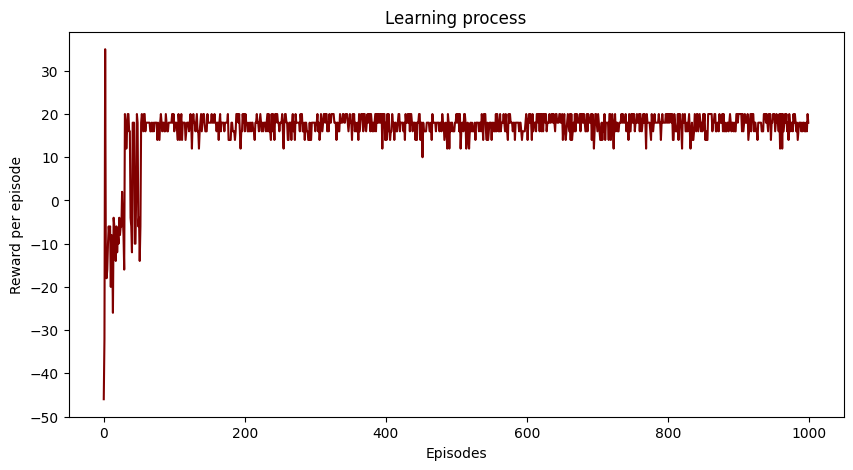

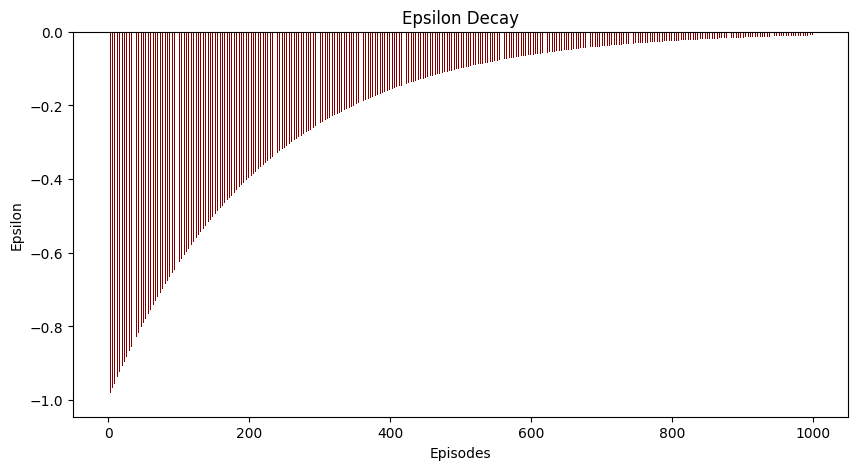

In [ ]:
# Run your environment for at least 10 episodes, where the agent chooses only greedy actions from
# the learned policy. Include a plot of the total reward per episode.

env = DeterministicEnvironment(steps=25)
ql = QLearning(env,episodes=1000)
ql.e = -1
ql.train()
ql.printTable("deterministic negative epsilon")
ql.printWins()
ql.getEpsilonData()

env = StochasticEnvironment(steps=25)
ql = QLearning(env,episodes=1000)
ql.e = -1
ql.train()
ql.printTable("stochastic negative epsilon")
ql.printWins()
ql.getEpsilonData()


In [ ]:
def tuneSteps(det=True):
  labels = []
  rewards = []
  steps = []
  successRates = []
  heading = "Deterministic - "
  if not det:
    heading = "Stochastic - "
  for i in range(10,50):

    # print("timesteps: ",i)
    env = 0
    if det:
      env = DeterministicEnvironment(steps=i)
    else:
      env = StochasticEnvironment(steps=i)
    ql = QLearning(env,episodes=1000)
    ql.train()

    # ql.printWins()
    labels.append(i)
    rewards.append(ql.getReward())
    successRates.append(ql.getSuccessRate())
    steps.append(ql.getSteps())

  fig, axs = plt.subplots(3)
  fig.suptitle(heading+'Hypertuning timesteps from 10...50')
  axs[0].plot(labels, rewards, color ='blue')
  axs[1].plot(labels, successRates, color="pink")
  axs[2].plot(labels, steps, color ='orange')

  names = ["Rewards", "Success rate", 'Steps taken']
  for i, ax in enumerate(axs.flat):
      ax.set(xlabel='Timesteps', ylabel=names[i])

  fig.savefig('steps_'+heading[0]+'.png')

In [ ]:
import time

def tuneEps(det=True):
  labels = []
  rewards = []
  steps = []
  successRates = []
  times = []
  heading = "Deterministic - "
  if not det:
    heading = "Stochastic - "
  for i in range(1,50):
    env = 0
    if det:
      env = DeterministicEnvironment(steps=25)
    else:
      env = StochasticEnvironment(steps=25)
    ql = QLearning(env,episodes=i*100)

    start_time = time.time()
    ql.train()
    times.append(time.time()-start_time)
    labels.append(i*100)
    rewards.append(ql.getReward())
    successRates.append(ql.getSuccessRate())
    steps.append(ql.getSteps())

  fig, axs = plt.subplots(4)
  fig.suptitle(heading+'Hypertuning episodes from 100...5000')
  axs[0].plot(labels, rewards, color ='blue')
  axs[1].plot(labels, successRates, color="pink")
  axs[2].plot(labels, steps, color ='orange')
  axs[3].plot(labels, times, color ='red')

  names = ["Rewards", "Success rate", 'Steps taken', "Time"]
  for i, ax in enumerate(axs.flat):
      ax.set(xlabel='Episodes', ylabel=names[i])

  fig.savefig('eps_'+heading[0]+'.png')

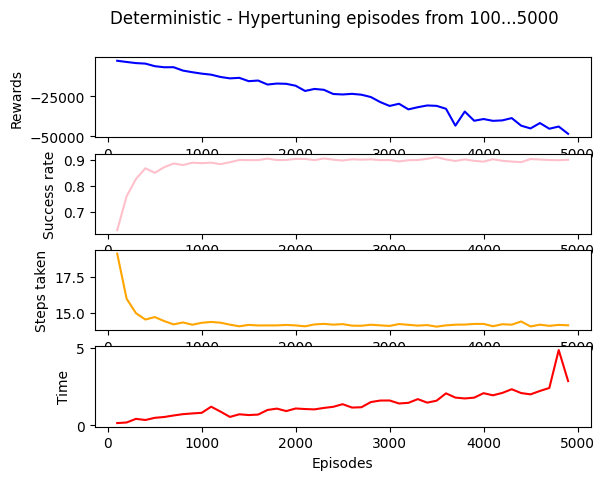

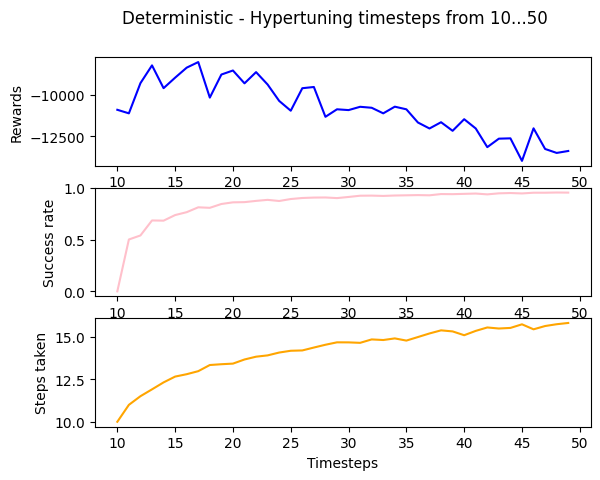

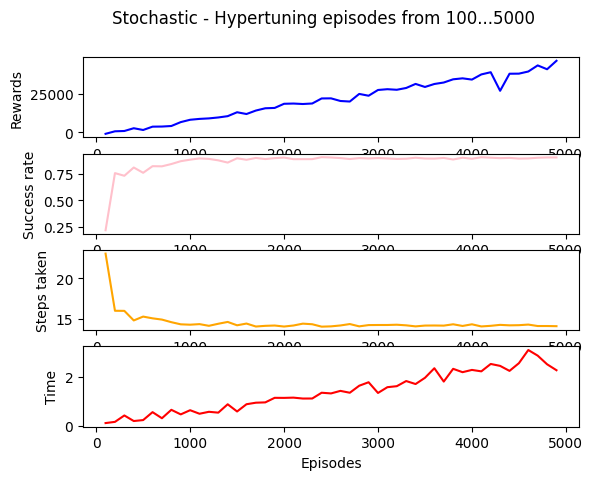

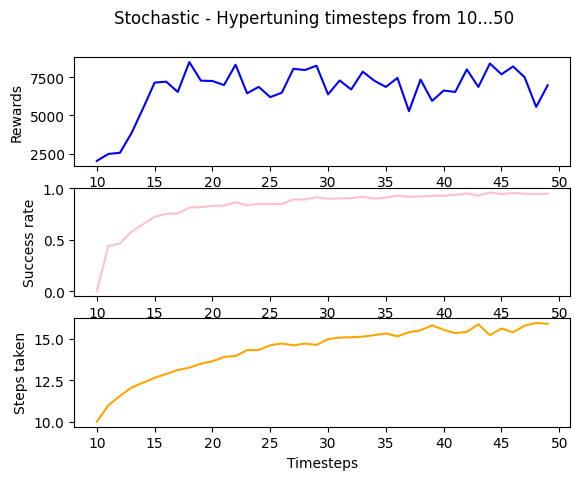

In [ ]:
tuneEps()
tuneSteps()
tuneEps(False)
tuneSteps(False)